# Heatmap for key variables

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel
# import timedelta
from datetime import timedelta
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_cut_final = pd.read_csv('../../data/tidy/paired_data/final_data_for_analysis_iob_check.csv')

In [12]:
df_cut_final[df_cut_final['ID']=='helm_1']

,bout_id,ID,start_datetime,duration,intensity,type_of_exercise,finish_datetime,month,day,day_of_week,...,cv_quadratic,glc_quadratic,age_quadratic,bmi_quadratic,iob_cubed,start_roc_cubed,cv_cubed,glc_cubed,age_cubed,bmi_cubed
0,0,helm_1,2020-05-14 09:57:57,30.0,0.0,Study Video,2020-05-14 10:27:57,5.0,14.0,3.0,...,1.692958,171.8721,441,553.612881,0.000000,7.414875e-06,2.202771,2253.243231,9261,13025.94617
1,1,helm_1,2020-05-21 21:29:02,30.0,0.0,Study Video,2020-05-21 21:59:02,5.0,21.0,3.0,...,71.101229,134.7921,441,553.612881,0.000000,1.447031e-04,599.536541,1564.936281,9261,13025.94617
2,2,helm_1,2020-05-30 17:29:05,28.0,1.0,Jogging/Running (Indoor or Outdoor),2020-05-30 17:57:05,5.0,30.0,5.0,...,53.043476,173.4489,441,553.612881,2.483227,-5.120000e-07,386.320691,2284.322013,9261,13025.94617
1546,0,helm_1,2020-05-14 07:36:00,30.0,-1.0,NaN,NaN,NaN,NaN,NaN,...,1.980103,166.1521,441,553.612881,0.000000,2.744000e-06,2.786324,2141.700569,9261,13025.94617
1547,1,helm_1,2020-05-12 18:11:00,30.0,-1.0,NaN,NaN,NaN,NaN,NaN,...,51.583563,128.3689,441,553.612881,0.000000,1.038230e-04,370.481912,1454.419637,9261,13025.94617
1548,2,helm_1,2020-06-06 19:22:00,28.0,-1.0,NaN,NaN,NaN,NaN,NaN,...,34.272905,173.4489,441,553.612881,0.046011,-5.120000e-07,200.644090,2284.322013,9261,13025.94617


In [13]:
df_cut_final['glc'] = df_cut_final['glc']*18
df_cut_final['glc_change'] = df_cut_final['glc_change']*18


In [6]:
df_cut_final['ID'].value_counts().std()

5.349531708211248

In [7]:
df_cut_final.groupby('ID').count()

,bout_id,start_datetime,duration,intensity,type_of_exercise,finish_datetime,month,day,day_of_week,time_of_day,...,cv_quadratic,glc_quadratic,age_quadratic,bmi_quadratic,iob_cubed,start_roc_cubed,cv_cubed,glc_cubed,age_cubed,bmi_cubed
ID,,,,,,,,,,,,,,,,,,,,,
dexip_101,2,2,2,2,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
dexip_102,2,2,2,2,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
dexip_105,2,2,2,2,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
dexip_107,2,2,2,2,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
dexip_11,2,2,2,2,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
helm_970,2,2,2,2,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
helm_971,4,4,4,4,2,2,2,2,2,2,...,4,4,4,4,4,4,4,4,4,4
helm_974,6,6,6,6,3,3,3,3,3,3,...,6,6,6,6,6,6,6,6,6,6


In [15]:
df_cut_final['glc_bin'] = pd.cut(df_cut_final['glc'], bins=[0, 220, 260, 1000], labels=['180-220', '220-260','>260'])

In [16]:
# Fit the mixed-effects model
model = smf.mixedlm(
    "glc_change ~ exercise * (C(glc_bin) + C(start_roc_bin))",  
    data=df_cut_final,
    groups=df_cut_final["ID"],  
)

In [17]:
start_roc_bins = df_cut_final.start_roc_bin.unique()
glc_bins = df_cut_final.glc_bin.unique()

In [18]:
result = model.fit(reml=True)


/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/statsmodels/base/mode

In [19]:
print(result.summary())

                      Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         glc_change 
No. Observations:          3092            Method:                     REML       
No. Groups:                482             Scale:                      1389.6698  
Min. group size:           2               Log-Likelihood:             -15744.7424
Max. group size:           34              Converged:                  No         
Mean group size:           6.4                                                    
----------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
----------------------------------------------------------------------------------
Intercept                            -1.866    2.310  -0.808 0.419  -6.394   2.662
C(glc_bin)[T.220-260]               -20.020    2.367  -8.460 0.000 -24.659 -15.382
C(glc_bin)[T.>260]         

In [20]:


# Create a DataFrame with all possible combinations of bins
# Create a DataFrame with all possible combinations
grid = pd.DataFrame([(g, r) for g in glc_bins for r in start_roc_bins], columns=['glc_bin', 'start_roc_bin'])

grid["glc_bin"] = grid["glc_bin"].astype("category")
grid["start_roc_bin"] = grid["start_roc_bin"].astype("category")
# Predict glucose change for exercise
grid_exercise = grid.copy()
grid_exercise["exercise"] = 1
grid_exercise["predicted_glc_change"] = result.predict(grid_exercise)

# Predict glucose change for non-exercise
grid_nonexercise = grid.copy()
grid_nonexercise["exercise"] = 0
grid_nonexercise["predicted_glc_change"] = result.predict(grid_nonexercise)

In [21]:
# **EASIEST FIX: Adjust Order While Plotting**
glucose_order = sorted(grid_exercise["glc_bin"].unique(), reverse=True)  # Highest glucose at top
roc_order = ["Rising", "Stable", "Falling"]  # Custom order for rate of change

# Pivot tables for heatmaps
pivot_exercise = grid_exercise.pivot(index="glc_bin", columns="start_roc_bin", values="predicted_glc_change")
pivot_nonexercise = grid_nonexercise.pivot(index="glc_bin", columns="start_roc_bin", values="predicted_glc_change")

# **Ensure shared color scale across both heatmaps**
vmin = min(pivot_exercise.min().min(), pivot_nonexercise.min().min())
vmax = max(pivot_exercise.max().max(), pivot_nonexercise.max().max())


/tmp/ipykernel_1834420/756446853.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Make space for the colorbar


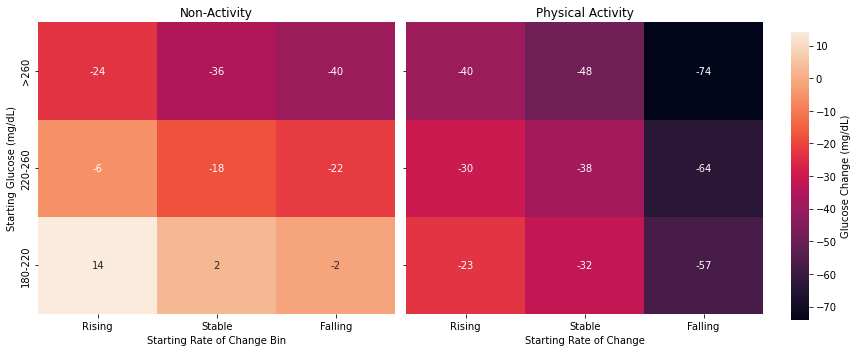

In [23]:
# 🔥 **Shared Colorbar Fix**
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True, gridspec_kw={"width_ratios": [1, 1]})

# Create an extra axis for a shared colorbar
cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8], )  # Position the colorbar to the right

sns.heatmap(pivot_nonexercise.reindex(index=glucose_order, columns=roc_order), annot=True, fmt=".0f", cbar=False, vmin=vmin, vmax=vmax, ax=axes[0])
axes[0].set_title("Non-Activity")
axes[0].set_xlabel("Starting Rate of Change Bin")
axes[0].set_ylabel("Starting Glucose (mg/dL)")

sns.heatmap(pivot_exercise.reindex(index=glucose_order, columns=roc_order), annot=True, fmt=".0f", cbar=True, cbar_ax=cbar_ax, vmin=vmin, vmax=vmax, ax=axes[1])
axes[1].set_title("Physical Activity")
axes[1].set_xlabel("Starting Rate of Change")
axes[1].set_ylabel("")
cbar_ax.set_ylabel("Glucose Change (mg/dL)")

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Make space for the colorbar
plt.savefig('../../results/figs/heatmap.png')